## Livro

Bibliotecas - Pag 15 e 16

Cookiecutter (Pag 21): https://github.com/drivendata/cookiecutter-data-science

## **Bibliotecas (Import)**


In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.datasets import load_boston

from sklearn.model_selection import (
    train_test_split
    )

from sklearn import (
    metrics
    )

from sklearn import (
    preprocessing
    )

In [2]:
#!pip uninstall pandas-profiling
#!pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

In [3]:
import warnings
warnings.filterwarnings('ignore')

## **Sobre o dataset**

 The Boston house-price data of Harrison, D. and Rubinfeld, D.L. 'Hedonic
 prices and the demand for clean air', J. Environ. Economics & Management,
 vol.5, 81-102, 1978.   Used in Belsley, Kuh & Welsch, 'Regression diagnostics
 ...', Wiley, 1980.   N.B. Various transformations are used in the table on
 pages 244-261 of the latter.

 Variables in order:

---

 **CRIM**     per capita crime rate by town
 
---

 **ZN**     proportion of residential land zoned for lots over 25,000 sq.ft.
 
---

 **INDUS**    proportion of non-retail business acres per town
 
---

 **CHAS**     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
 
---

 **NOX**      nitric oxides concentration (parts per 10 million)

---

 **RM**       average number of rooms per dwelling

---

 **AGE**      proportion of owner-occupied units built prior to 1940

---

 **DIS**      weighted distances to five Boston employment centres

---

 **RAD**     index of accessibility to radial highways

---

 **TAX**     full-value property-tax rate per $10,000

---

 **PTRATIO**  pupil-teacher ratio by town

---

 **B**        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town

---

 **LSTAT**    % lower status of the population

---

 **MEDV**     Median value of owner-occupied homes in $1000's

---


## **Coleta de dados**


In [4]:
b = load_boston()

In [5]:
bos_X = pd.DataFrame(b.data, columns=b.feature_names)
bos_y = b.target

In [27]:
df = pd.concat([bos_X, pd.DataFrame(bos_y, columns=['target'])], axis=1)

In [6]:
bos_X

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [7]:
from sklearn.model_selection import train_test_split
bos_X_train, bos_X_test, bos_y_train, bos_y_test = train_test_split(bos_X, bos_y, test_size=0.3, random_state=42)

In [8]:
sd = preprocessing.StandardScaler()
bos_sX = sd.fit_transform(bos_X)
bos_sX = pd.DataFrame(bos_sX, columns=bos_X.columns)

In [9]:
from sklearn.model_selection import train_test_split
bos_sX_train, bos_sX_test, bos_sy_train, bos_sy_test = train_test_split(bos_X, bos_y, test_size=0.3, random_state=42)

Modelo base = No sklearn o resultado score é coeficiente de determinação (r² ou R²). Esse número explica o percentual de variação de dados de entrada capturado pela predição.

In [10]:
from sklearn.dummy import DummyRegressor
dr = DummyRegressor()
dr.fit(bos_X_train, bos_y_train)
dr.score(bos_X_test, bos_y_test)

-0.03469753992352409

In [11]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(random_state=42, n_estimators=100)
rfr.fit(bos_X_train, bos_y_train)

RandomForestRegressor(random_state=42)

In [12]:
bos_y_pred = rfr.predict(bos_X_test)

## **Score/R²**

In [13]:
rfr.score(bos_X_test, bos_y_test)

0.8708997131330258

In [14]:
metrics.r2_score(bos_y_test, bos_y_pred)

0.8708997131330258

## **Variância explicada**

In [15]:
metrics.explained_variance_score(bos_y_test, bos_y_pred)

0.87128003640625

## **Erro médio absoluto (MAE)**

In [16]:
metrics.mean_absolute_error(bos_y_test, bos_y_pred)

2.083605263157894

## **Erro quadrático médio (MSE)**

In [17]:
metrics.mean_squared_error(bos_y_test, bos_y_pred)

9.619662013157892

## **Erro logarítmico quadrático médio**

In [18]:
metrics.mean_squared_log_error(bos_y_test, bos_y_pred)

0.021287355070019227

## **Gráfico de resíduos**

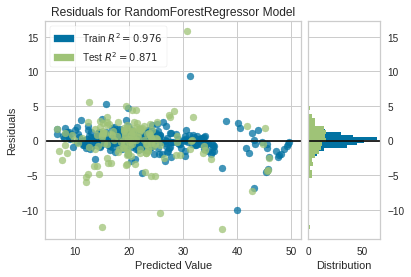

In [19]:
from yellowbrick.regressor import ResidualsPlot
fig, ax = plt.subplots(figsize=(6,4))
rpv = ResidualsPlot(rfr)
rpv.fit(bos_X_train, bos_y_train)
rpv.score(bos_X_test, bos_y_test)
rpv.poof()

## **Heterocedasticidade**

In [ ]:
#!pip install statsmodels

In [32]:
import statsmodels.stats.api as sms
import statsmodels.formula.api as smf

resids = bos_y_test - rfr.predict(bos_X_test)

hb = sms.het_breuschpagan(resids, bos_X_test)
labels = [
    "Lagrange multiplier statistic",
    "p-value",
    "f-value",
    "f p-value"
]

for name, num in zip(labels, hb):
  print(f'{name}: {num:.2}')

Lagrange multiplier statistic: 3.5e+01
p-value: 0.00041
f-value: 3.2
f p-value: 0.00027


## **Resíduo com distribuição normal**

Histograma de resíduos

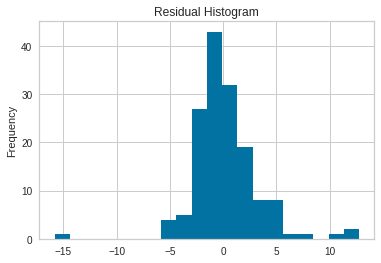

In [33]:
fig, ax = plt.subplots(figsize=(6,4))
resids = bos_y_test - rfr.predict(bos_X_test)
pd.Series(resids, name='residuals').plot.hist(
    bins=20, ax=ax, title="Residual Histogram"
)

Probabilidade de resíduos

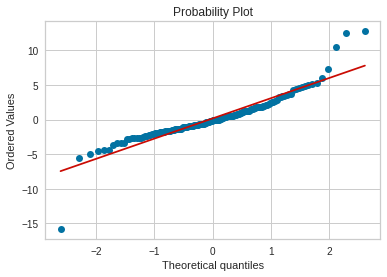

In [34]:
from scipy import stats
fig, ax = plt.subplots(figsize=(6,4))
_ = stats.probplot(resids, plot=ax)

O teste de Kolmogorov-Smirnov é capaz de avaliar se uma distribuição é normal. Se o valor p for significativo (< 0,05) é sinal que os valores não apresentam uma distribuição normal.

In [35]:
stats.kstest(resids, cdf='norm')

KstestResult(statistic=0.2030324289045929, pvalue=5.705755737845543e-06)

## **Gráfico de erros de predição**

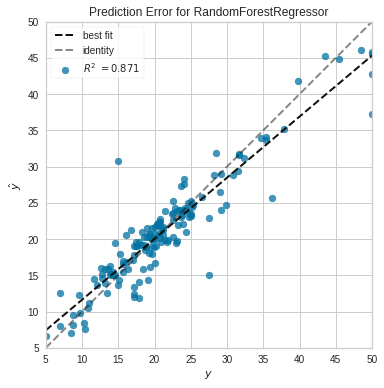

In [36]:
from yellowbrick.regressor import PredictionError
fig, ax = plt.subplots(figsize=(6,6))

pev = PredictionError(rfr)
pev.fit(bos_X_train, bos_y_train)
pev.score(bos_X_test, bos_y_test)
pev.poof()